Back to the main [Index](../index.ipynb)

#### Stochastic simulation

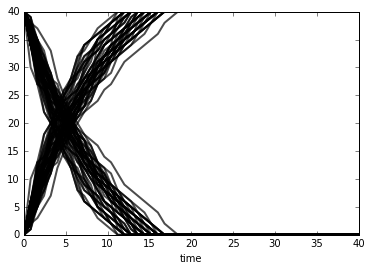

In [1]:
%matplotlib inline
from __future__ import print_function
import tellurium as te
import numpy as np

r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 40')
r.setIntegrator('gillespie')
r.setSeed(1234)

results = []
for k in range(1, 50):
    r.reset()
    s = r.simulate(0, 40)
    results.append(s)
    r.plot(s, show=False, loc=None, color='black', alpha=0.7)

#### Seed
Setting the identical seed for all repeats results in a reproducible stochastic simulation.

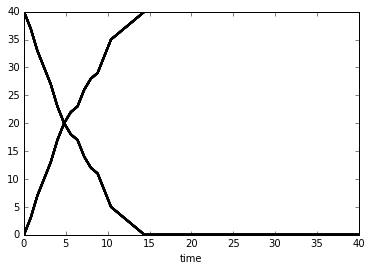

In [2]:
results = []
for k in range(1, 20):
    r.reset()
    r.setSeed(123456)
    s = r.simulate(0, 40)
    results.append(s)
    r.plot(s, show=False, loc=None, color='black', alpha=0.7)

#### Run two simulations and combine the two

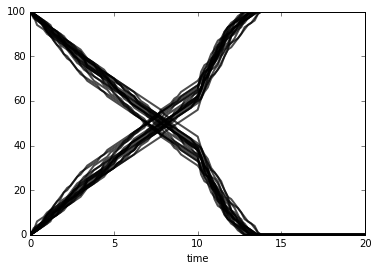

In [3]:
import tellurium as te
import numpy as np

r = te.loada('S1 -> S2; k1*S1; k1 = 0.02; S1 = 100')
r.setSeed(1234)
for k in range(1, 20):
    r.resetToOrigin()
    res1 = r.gillespie(0, 10)
    # change in parameter after the first half of the simulation
    r.k1 = r.k1*20
    res2 = r.gillespie (10, 20)
    r.plot(np.vstack([res1, res2]), color='black', alpha=0.7, show=False, loc=None)